In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [19]:
#   S A B C D E G
a=[[0,3,5,0,0,0,0], # S
   [0,0,4,0,3,0,0], # A
   [0,0,0,4,0,0,0], # B
   [0,0,0,0,0,6,0], # C
   [0,0,0,0,0,0,5], # D
   [0,0,0,0,0,0,0], # E
   [0,0,0,0,0,0,0]] # G

In [195]:
#    0 1 2 3 4 5 6   S A B D C G
#   S A B C D E G
a=[[0,3,5,0,0,0,0], # S
   [3,0,4,0,3,0,0], # A
   [5,4,0,4,0,0,0], # B
   [0,0,4,0,0,6,0], # C
   [0,3,0,0,0,0,5], # D
   [0,0,0,6,0,0,0], # E
   [0,0,0,0,5,0,0]] # G

In [338]:
#    0 1 2 3 4 5 6   S A B D C G
#   S A B C D E G
a=[[0,3,5,0,0,0,0], # S
   [3,0,4,0,3,0,0], # A
   [5,4,0,4,0,0,0], # B
   [0,0,4,0,0,6,0], # C
   [0,3,0,0,0,0,5], # D
   [0,0,0,6,0,0,0], # E
   [0,0,0,0,5,0,0]] # G
def dfs(arr,dest_node):
    stack=[]
    vis=[]
    next_node=0
    while next_node!=dest_node:
        for i in range(0,7):
            if(i not in vis):
                stack.append(i)
        next_node=stack.pop(0)
        vis.append(next_node)
    print(vis)
dfs(a,'G')

IndexError: pop from empty list

In [196]:
def bfs(arr,axes):
    queue=[]
    vis=[]
    vis.append(0)
    k=0
    next_node=0

    while len(vis)<7:
        for i in range(0,7):
            if( (arr[next_node][i]>1) and i not in vis and i not in queue):
                queue.append(axes[i])

        queue.sort(key=lambda k:(axes[k]))
        next_node=queue.pop(0)
        vis.append(next_node)
        k+=1
        print(queue)
    print((vis))
bfs(np.array(a),axes)

TypeError: list indices must be integers or slices, not str

In [3]:
real_cost=np.array(a)

In [4]:
real_cost

array([[0, 3, 5, 0, 0, 0, 0],
       [3, 0, 4, 0, 3, 0, 0],
       [5, 4, 0, 4, 0, 0, 0],
       [0, 0, 4, 0, 0, 6, 0],
       [0, 3, 0, 0, 0, 0, 5],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0]])

In [5]:

axes=['S','A','B','C','D','E','G']
r_c=pd.DataFrame(a,columns=axes)
r_c.index=axes

In [26]:
def convert_adjmat_to_nx_graph(r_c,axes):
    g=nx.Graph()
    for u in axes:
        g.add_node(u)
        
    d={u: u for u in axes}
    j=0
    for u in axes:
        for k in axes:
            if r_c[u][k]>0:
                g.add_edge(u,k)
                #d.update({k:j})
                j+=1
    print(d)
    nx.draw_networkx_labels=(g,pos=nx.spring_layout(g))
    
convert_adjmat_to_nx_graph(r_c,axes)

SyntaxError: invalid syntax (3323424293.py, line 14)

In [93]:
def BMS(arr):
    l=[]
    vis=[]
    path=[]
    tmp=[]
    vis+='S'
    tmp+='S'
    c=0
    while True:
        if len(vis)>=len(arr.index):
            break
        for j in axes:
            if j not in vis :
                
                if arr[tmp[-1]][j]>0:
                    #print(vis,j,arr[vis[-1]][j],"\n")
                    tmp+=j
                    c+=1
        for i in range(c):
            print(tmp[i],j,"\n")
            vis+=tmp[i]
        tmp=[]
        c=0             
        
        
        print(vis)
        
       
        #x='G'
       
                
                        
                
    print(set(vis))
BMS(r_c)

S G 

A G 

B G 

C G 

['S', 'S', 'A', 'B', 'C']


IndexError: list index out of range

In [28]:
r_c=r_c
r_c

S  A  B  C  D  E  G
S  0  3  5  0  0  0  0
A  0  0  4  0  3  0  0
B  0  0  0  4  0  0  0
C  0  0  0  0  0  6  0
D  0  0  0  0  0  0  5
E  0  0  0  0  0  0  0
G  0  0  0  0  0  0  0

In [97]:
#   S A B C D E G
heuristic=[[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf], # S
   [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,7.1], # A
   [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,6.0], # B
   [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,7.2], # C
   [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf], # D
   [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf], # E
   [np.inf,7.1,6.0,7.2,5,np.inf,0]] # G


In [98]:
h_c=pd.DataFrame(heuristic,index=axes,columns=axes)
h_c

S    A    B    C    D    E    G
S  inf  inf  inf  inf  inf  inf  inf
A  inf  inf  inf  inf  inf  inf  7.1
B  inf  inf  inf  inf  inf  inf  6.0
C  inf  inf  inf  inf  inf  inf  7.2
D  inf  inf  inf  inf  inf  inf  inf
E  inf  inf  inf  inf  inf  inf  inf
G  inf  7.1  6.0  7.2  5.0  inf  0.0

In [99]:
def hill_climb(arr,heuristic):
    l=[]
    vis=[]
    nextnode=[]
    '''
    #initial search
    for i in axes:
        print(i)
        if arr['S'][i]>0:
            l+=[[i,heuristic[i]['G']]]
    #vis+='S'
    '''
    path=[]
    vis+='S'
    while True:
        if 'G' in vis:
            break
        for j in axes:
            if j not in vis :
                if arr[vis[-1]][j]>0:
                    print(vis,j,arr[vis[-1]][j],"\n")
                    if heuristic[j]['G']!=np.inf:
                        print("eeee==",j)
                        l+=[[j,heuristic[j]['G']]] #[col][row]
                        
        l.sort(key=lambda k:k[1])
        
        print(vis)
        vis+=l[0][0]
        l.pop(0)
        #x='G'
       
                
                        
                        
    print(l)
            
    print(vis)
            

In [100]:
hill_climb(r_c,h_c)

['S'] A 3 

eeee== A
['S'] B 5 

eeee== B
['S']
['S', 'B'] A 4 

eeee== A
['S', 'B'] C 4 

eeee== C
['S', 'B']
['S', 'B', 'A'] D 3 

eeee== D
['S', 'B', 'A']
['S', 'B', 'A', 'D'] G 5 

eeee== G
['S', 'B', 'A', 'D']
[['A', 7.1], ['C', 7.2]]
['S', 'B', 'A', 'D', 'G']


In [33]:
def beam_width(arr):
    j=0
    for i in arr.index:
        #print(i)
        
        print(arr[i]['S'])
        if(arr[i]['S']>0):
            #print(arr[i]['S'])
            j+=1
    return j
beam_width(r_c)

0
3
5
0
0
0
0


2

In [34]:
def beam_search_1(beam_width,arr_rc,heuristic,axes):
    ol=[]
    ol+='S'
    tmp=[]
    for i in axes:
        if (arr_rc[i]['S']>0):
            tmp+=i
    ol=tmp
    print(ol,tmp)
    
beam_search_1(2,r_c,h_c,axes)
    

['A', 'B'] ['A', 'B']


In [35]:
def beam_search(beam_width,arr_rc,arr_hc,axes):
    #assert(beam_width<=beam_width(arr_rc))
    l=[]
    
    for i in 'S':
        for j in axes:
            if(arr_rc[i][j]>0):
                l.append([j,arr_hc['G'][j]])
        l.sort(key=lambda k: k[1])
        #next_node=l.pop(0)
    next_node=l.pop(0)
    #while (next_node[0]!='G'):
    for i in arr_rc[next_node[0]]:
        if(i==arr_rc[next_node[0]]['S']):
            print('dd')
            continue
        if i>0:
             print([i])   
            
    print(l)
beam_search(2,r_c,h_c,axes)


IndexError: pop from empty list

In [36]:
# Doesnt work currently
def bs(arr,heuristic,beam_width):
    l=[]
    cl=[]
    ol=[]
    ol+='S'
    path=[]
    vis+='S'
    while len(ol)!=0:
        b=ol[0]
        ol.remove(b)
        cl.append(b)
        if b=='G':
            path.append(b)
            break
        N=b
        for j in axes:
            if j not in cl or j not in ol:
                ol.append(j,)
            elif j in ol:
                if 
            elif j not in cl:
                ol.append(j)
        if len(ol)>beam_width:
            ol.sort(lambda k:arr[])
            
            if j not in vis :
                if arr[vis[-1]][j]>0:
                    print(vis,j,arr[vis[-1]][j],"\n")
                    if heuristic[j]['G']!=np.inf:
                        print("eeee==",j)
                        l+=[[j,heuristic[j]['G']]] #[col][row]
                        
        l.sort(key=lambda k:k[1])
        for i in range(beam_width):
            if 
        print(vis)
        vis+=l[0][0]
        l.pop(0)
        #x='G'
       
                
                        
                        
    print(l)
            
    print(vis)

SyntaxError: invalid syntax (1251077533.py, line 21)

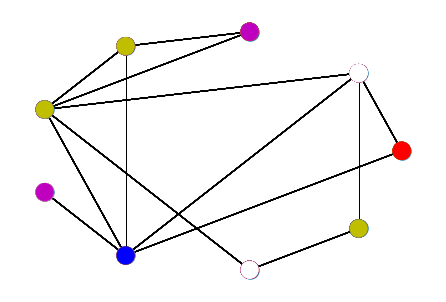

In [387]:
import networkx as nx
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import random

# Animation funciton
def animate(i):
    colors = ['r', 'b', 'g', 'y', 'w', 'm']
    nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])
# Graph initialization
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
nx.draw_circular(G)
fig = plt.gcf()

# Animator call
anim = animation.FuncAnimation(fig, animate, frames=20, interval=20)
anim.save("D://sk.mp4")

In [12]:
def construct_NODE(pre,cur,cost):
    return [pre,cur,cost]

def oraclesearch(graph,axes):
    l=[]
    path=[]
    nextnode='S'
    l.append(construct_NODE("",nextnode,0))
    print(l)
    c=0
    for i in l:
        if(len(l)==0):
            break
        for j in axes:
            if(graph[i[1]][j]>0):
                #print(l)
                l.append(construct_NODE(i[1],j,i[-1]+graph[i[1]][j]))
                print(l)
                c+=1
        k=l.pop(0)
        l.sort(key=lambda x: x[-1])      ##Reimplement the same with priority queue later !   
        
        for l1 in range(c):
            path.append(k)
        
    #print(path)
oraclesearch(r_c,axes)
#print(axes)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['A', 'D', 112], ['E', 'C', 113], ['C', 'E', 113], ['C', 'E', 113], ['C', 'E', 113], ['C', 'E', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['S', 'B', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['C', 'B', 113], ['C', 'B', 113], ['C', 'B', 113], ['C', 'B', 113], ['B', 'A', 113], ['B', 'C', 113], ['A', 'B', 113], ['A', 'B', 113], ['B', 'A', 113], ['B', 'C', 113], ['C', 'B', 113], ['A', 'B', 113], ['B', 'A', 113], ['B', 'C', 113], ['A', 'B', 113], ['A', 'B', 113], ['B', 'A', 113], ['B', 'C', 113], ['B', 'A', 113], ['B', 'C', 113], ['A', 'B', 113], ['A', 'B', 113], ['A', 'B', 113], ['A', 'B', 113], ['A', 'B', 113], ['S', 'A', 11

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['S', 'A', 131], ['B', 'S', 132], ['G', 'D', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['B', 'S', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 132], ['A', 'S', 132], ['A', 'D', 13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['S', 'B', 143], ['C', 'B', 143], ['C', 'B', 143], ['C', 'B', 143], ['C', 'B', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 143], ['B', 'A', 143], ['B', 'C', 14

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 164], ['B', 'S', 16

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [11]:
r_c

S  A  B  C  D  E  G
S  0  3  5  0  0  0  0
A  3  0  4  0  3  0  0
B  5  4  0  4  0  0  0
C  0  0  4  0  0  6  0
D  0  3  0  0  0  0  5
E  0  0  0  6  0  0  0
G  0  0  0  0  5  0  0

In [28]:
def makeMat(levels):
    axes=['S','A','B','C','D','E','G']
    r_c1=pd.DataFrame(a[:levels],columns=axes)
    r_c1.index=[i for i in range(levels)]
    r_c1[r_c1>0]=0
    return r_c1

S  A  B  C  D  E  G
0  0  0  0  0  0  0  0
1  0  0  0  0  0  0  0
2  0  0  0  0  0  0  0

In [ ]:
def traverse():
    le

In [3]:
path=[]

path.append((0,[0],0))

#g=[[0,3,5,0,0,0,0],[3,0,4,0,3,0,0],[5,4,0,4,0,0,0],[0,0,4,0,0,6,0],[0,3,0,0,0,0,5],[0,0,0,6,0,0,0],[0,0,0,0,5,0,0]]

g=[[0,1,1,1,0],[1,0,1,0,0],[1,1,0,0,1],[1,0,0,0,0],[0,0,1,0,0]]

s,d=0,4

to_visit=[]

cost=0

o=2



def check(i,s):

    for k in path:

        if (k[0]==s):

            for j in k[1]:

                if(i==j):

                    return 0

    return 1



def bnb(s,d,c,o):

    for i in range(5):

        if(g[s][i]!=0 and (c+g[s][i])<=o and check(i,s)):

            if(i==d):

                print("Path reached")

                way=path[-1][1]

                path.append([d,way+[d],c+g[s][i]])

                print("Path: ",path[-1][1])

                print("Cost: ",path[-1][2])

                return 1

            to_visit.append((i,c+g[s][i],s))

    min=100

    n2=0

    for j in range(len(to_visit)):

        if(min>to_visit[j][1]):

            min=to_visit[j][1]

            n2=j

    node,cost,source=to_visit.pop(n2)

    way=[]

    for i in range(len(path)):

        if(path[i][0]==source and path[i][2]<cost):

            way=path[i][1]

            break

    path.append((node,way+[node],cost))

    if(bnb(node,d,cost,o)):

        exit()



bnb(s,d,0,o)

Path reached
Path:  [0, 2, 4]
Cost:  2


In [6]:
from anytree import Node, RenderTree
from anytree.exporter import UniqueDotExporter

In [20]:
root = Node("root")

# Create the child nodes
child1 = Node("child1", parent=root)
child2 = Node("child2", parent=root)
child3 = Node("child3", parent=root)
child4 = Node("child4", parent=child1)
child5 = Node("child5", parent=child2)
child6 = Node("child6", parent=child3)
print("child1" in str(child6.ancestors[-1]))
# Print the tree structure
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

# Export the tree as an image
UniqueDotExporter(root).to_dotfile("D:\\test123.dot")

False
root
├── child1
│   └── child4
├── child2
│   └── child5
└── child3
    └── child6


In [10]:
pip install --upgrade anytree

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'E:\anaconda\python.exe -m pip install --upgrade pip' command.


In [7]:
from  anytree  import *

In [17]:
DotExporter()

NameError: name 'DotExporter' is not defined

In [9]:
parent=r_c.index

In [10]:
r_c

S  A  B  C  D  E  G
S  0  3  5  0  0  0  0
A  3  0  4  0  3  0  0
B  5  4  0  4  0  0  0
C  0  0  4  0  0  6  0
D  0  3  0  0  0  0  5
E  0  0  0  6  0  0  0
G  0  0  0  0  5  0  0

In [53]:
root=Node('S')
for i in axes:
    
    if(r_c['A'][i]>0):
        Node(i,parent=root)
for i in axes[1:]:
    if(r_c['A'][i]>0):
        n2=Node('A')
        Node(i,parent=n2)
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


S
├── S
├── B
└── D


In [61]:
root=Node('S')
b=Node('B',parent=root)
a=Node('A')
n=Node('B')
n.parent=a
#Node('B',parent=a)
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


S
└── B


In [62]:
r_c

S  A  B  C  D  E  G
S  0  3  5  0  0  0  0
A  3  0  4  0  3  0  0
B  5  4  0  4  0  0  0
C  0  0  4  0  0  6  0
D  0  3  0  0  0  0  5
E  0  0  0  6  0  0  0
G  0  0  0  0  5  0  0

In [12]:
d={}
for i in parent:
    d.update({i:Node(i)})
for i in parent:
    if(r_c['S'][i]>0):
        #print(i)
        d[i].parent=d['S']
for pre, fill, node in RenderTree(d['S']):
    print("%s%s" % (pre, node.name))       

S
├── A
└── B


In [79]:
l=[]
l.append(parent[0])
d={}
#for i in parent:
    #d.update({i:[0,Node(i)]})
c=0

while l!=0:
    try:
        if c==0:
            for i in parent:
                if(r_c['S'][i]>0):
                #print(i)
                    d.setdefault(i+str(r_c['S'][i]))
                    l.append(i+str(r_c['S'][i]))
                    d[i][0]=r_c['S'][i]
                    d[i][-1].parent=d['S'][-1]
            c+=1
            k=l.pop(0)
            break
        else:
            print("sill",l[0])
            for i in parent[1:]:
                    #print(i)
                    if (r_c[l[0]][i]>0 and i not in str(d[-1][l[0]].ancestors)):
                        print(str(d[l[0]].ancestors))
                        d[i].parent=d[l[0]]
                        print(i)
                        
            print("popped:",l.pop(0))
        
    except IndexError:
        break
print(d)
for pre, fill, node in RenderTree(d['S'][-1]):
    print("%s%s" % (pre, node.name))     

KeyError: 'A'

In [23]:
r_c['G']

S    0
A    0
B    0
C    0
D    5
E    0
G    0
Name: G, dtype: int64

In [73]:
from collections import defaultdict
data_dict = defaultdict(list)
data_dict.update({'s':1})
data_dict['s']=3

In [74]:
data_dict

defaultdict(list, {'s': 3})

In [77]:
d.setdefault('S')

[0, Node('/S')]

In [78]:
d

{'S': [0, Node('/S')],
 'A': [3, Node('/S/A')],
 'B': [5, Node('/S/B')],
 'C': [0, Node('/C')],
 'D': [0, Node('/D')],
 'E': [0, Node('/E')],
 'G': [0, Node('/G')],
 'y': None}

In [92]:
graph = {'A' : Node('A',(322 , 471), 5), 'B' : Node('B', (625, 335), 2), 'C' : Node('C', (468, 336), 4),\
        'D' : Node('D', (508, 250), 5), 'E' : Node('E', (479, 474), 3),'F' : Node('F', (316, 332), 5),\
            'G' : Node('G', (647, 472), 0), 'H' : Node('H', (461, 137), 5)}      
graph['A'].children = {'E' : 3, 'F' : 3}
graph['B'].children = {'C' : 3, 'D' : 3, 'H' : 2}
graph['C'].children = {'B' : 3, 'D' : 4, 'F' : 3, 'H' : 3}
graph['D'].children = {'B' : 3, 'C' : 4, 'H' : 3}
graph['E'].children = {'A' : 3, 'F' : 3, 'G' : 3}
graph['F'].children = {'A' : 3, 'C' : 3, 'E' : 3, 'H' : 4}
graph['G'].children = {'E' : 3} 
graph['H'].children = {'B' : 2, 'C' : 3, 'D' : 3, 'F' : 4}   

print(graph['H'].children['B'])

2


ModuleNotFoundError: No module named 'browser'

AttributeError: 'dict' object has no attribute 'goal'

In [129]:
d={
    'S':{'A':3,'B':5},
    'A':{'S':3,'B':4,'D':3},
    'B':{'S':5,'A':4,'C':4},
    'C':{'B':4,'E':6},
    'E':{'C':6},
    'D':{'A':3,'G':5},
    'G':{'D':5}
}

In [103]:
d['S']['A']

3

In [3]:
queue=[[0,'S']]
FR=[]
goal='G'
gn=[]
f=0
#print(queue)
n_g=0
f=n_g
while(len(queue)!=0):
    #print(queue)
    sl=[]
    cp=queue.pop(0)
    n=cp[-1]
    for i in d[n].keys():
        #print(i)
        if i in cp:
            continue
        el=cp+[i]
        el[0]+=d[n][i]
        sl.append(el)
        queue.append(el)
        queue.sort(key=lambda x: x[0])
        if goal==i:
            gn=el
            print(i)
            n_g+=1
            f+=1
        if(n_g==1):
            break
        else:
            continue
    for i in sl:
        FR.append(i)
    FR.sort(key=lambda k:k[0])
    if(f==1):
        break
print(FR)
print(gn)

G
[[3, 'S', 'A'], [5, 'S', 'B'], [6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C'], [11, 'S', 'A', 'D', 'G']]
[11, 'S', 'A', 'D', 'G']


In [149]:
d={
    'S':{'A':3,'B':5},
    'A':{'S':3,'B':4,'D':3},
    'B':{'S':5,'A':4,'C':4},
    'C':{'B':4,'E':6},
    'E':{'C':6},
    'D':{'A':3,'G':5},
    'G':{'D':5}
}

In [181]:
def oracle_search(d,start,goal,max_no_goalcutoff):
    '''
    params d=the adjacency dict,goal=goal node <str>,max_no_goalcutoff=set this as MAX_LIMIT to get all paths to goals or you can restrict the paths accessed
    returns oracle cost
    '''
    queue=[[0,start]]
    res=[]
    g=goal
    f=0
    n_g=max_no_goalcutoff
    while (len(queue)!=0):
        tmp=[]
        curr=queue.pop(0)         # This is the list of paths with index 0 storing cumulative cost
        currnode=curr[-1]           # This is the last node in the traversed path
        for i in d[currnode].keys():
            if i in curr:continue   # prevent accessing ancesstors to child
            tmp1=curr+list(i)
            tmp1[0]=curr[0]+d[currnode][i]
            tmp.append(tmp1)
            queue.append(tmp1)
            queue.sort(key=lambda k1:k1[0])   # Should have used a priority queue but sort works !
            if g==i:f+=1
        for i in tmp:res.append(i)
        if(f==n_g):break
    print(res)
    goal_node=[]
    for i in res:
        if 'G' in i:goal_node.append(i)
    print('Oracle Paths:',goal_node)
    return goal_node[0][0] # return oracle cost for B&b
oracle_search(d,'S','G',2)   

[[3, 'S', 'A'], [5, 'S', 'B'], [7, 'S', 'A', 'B'], [6, 'S', 'A', 'D'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C'], [11, 'S', 'A', 'D', 'G'], [11, 'S', 'A', 'B', 'C'], [12, 'S', 'B', 'A', 'D'], [15, 'S', 'B', 'C', 'E'], [17, 'S', 'A', 'B', 'C', 'E'], [17, 'S', 'B', 'A', 'D', 'G']]
Oracle Paths: [[11, 'S', 'A', 'D', 'G'], [17, 'S', 'B', 'A', 'D', 'G']]


11

In [45]:
def BMS(d,start,goal,max_no_goalcutoff):
    queue=[[start]]
    #print(queue[-1][-1])
    res=[]
    g=goal
    f=0
    n_g=max_no_goalcutoff
    while (len(queue)!=0):
        tmp=[]
        curr=queue.pop(0)
        currnode=curr[-1][-1]
        for i in d[currnode].keys():
            if i in curr:continue
            tmp1=curr+list(i)
            #tmp1[0]=curr[0]+d[currnode][i]
            tmp.append(tmp1)
            queue.append(tmp1)
            queue.sort(key=lambda k1:ord(k1[-1]))
            if g==i:f+=1
        for i in tmp:res.append(i)
        if(f==n_g):break
    print(res)
    goal_node=[]
    for i in res:
        if 'G' in i:goal_node.append(i)
    print('BMS Paths:',goal_node)
    return res
BMS(d,'S','G',2)

[['S', 'A'], ['S', 'B'], ['S', 'A', 'B'], ['S', 'A', 'D'], ['S', 'B', 'A'], ['S', 'B', 'C'], ['S', 'B', 'A', 'D'], ['S', 'A', 'B', 'C'], ['S', 'B', 'C', 'E'], ['S', 'A', 'B', 'C', 'E'], ['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]
BMS Paths: [['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]


[['S', 'A'],
 ['S', 'B'],
 ['S', 'A', 'B'],
 ['S', 'A', 'D'],
 ['S', 'B', 'A'],
 ['S', 'B', 'C'],
 ['S', 'B', 'A', 'D'],
 ['S', 'A', 'B', 'C'],
 ['S', 'B', 'C', 'E'],
 ['S', 'A', 'B', 'C', 'E'],
 ['S', 'A', 'D', 'G'],
 ['S', 'B', 'A', 'D', 'G']]

In [7]:
g=nx.Graph()

In [8]:
g.add_nodes_from(d)

In [9]:
g

In [398]:
list(g.nodes)

['S', 'A', 'B', 'C', 'E', 'D', 'G']

In [10]:
for i in d.keys():
    for j in d[i].keys():
        g.add_edge(i,j)
        
        

In [11]:
g.edges()

EdgeView([('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'G')])

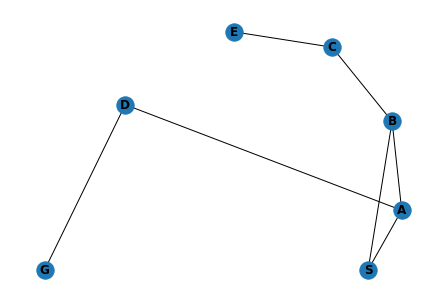

In [12]:
nx.draw_shell(g, list(g.nodes), with_labels=True, font_weight='bold')

In [227]:
#edge_colors = ["red" if edge in dijkstra_edges else "black" for edge in G.edges()]
def animate():
    for edge in g.edges:
        
        nx.draw(G, position, node_color=colors, edge_color="red", with_labels=True)
ani = animation.FuncAnimation(fig, animate, frames=6, interval=1000, repeat=True)   
anis
plt.show()

In [250]:
e=[]
for i in range (len(g.edges)):
    e+=["red"]
e[-1]="black"


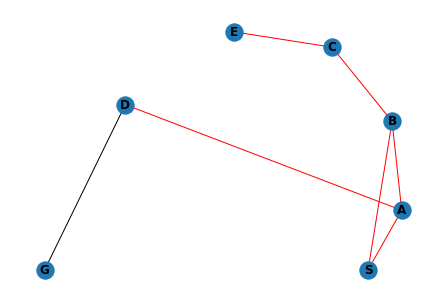

In [251]:
nx.draw_shell(g, list(g.nodes),edge_color=e, with_labels=True, font_weight='bold')

In [4]:
FR

[[3, 'S', 'A'],
 [5, 'S', 'B'],
 [6, 'S', 'A', 'D'],
 [7, 'S', 'A', 'B'],
 [9, 'S', 'B', 'A'],
 [9, 'S', 'B', 'C'],
 [11, 'S', 'A', 'D', 'G']]

In [5]:
l=[]
for i in FR:
    #print(i)
    st=i[1:]
    tmp=[]
    for c in range(len(i[1:])):
        
        tmp.append(st[c:c+2])
    tmp.pop(-1)
    l+=[tmp]
l

[[['S', 'A']],
 [['S', 'B']],
 [['S', 'A'], ['A', 'D']],
 [['S', 'A'], ['A', 'B']],
 [['S', 'B'], ['B', 'A']],
 [['S', 'B'], ['B', 'C']],
 [['S', 'A'], ['A', 'D'], ['D', 'G']]]

In [260]:
FR[0][1:]

['S', 'A']

In [13]:
def ret_edge(edge):
    
    c=0
    
    #print(edge)
    for i in g.edges:
        #print(i)
        if(edge==list(i) or edge[::-1]==list(i)):
            break
        c+=1
    #edge_col[c]="red"
    return c

print(ret_edge(edge=l[4][-1]))
#nx.draw_shell(g, list(g.nodes),edge_color=ret_edge(edge=l[4][-1]), with_labels=True, font_weight='bold')

2


In [285]:
['S','A']==list(('S','A'))

True

In [15]:
for i in g.edges:
    print(i)

('S', 'A')
('S', 'B')
('A', 'B')
('A', 'D')
('B', 'C')
('C', 'E')
('D', 'G')


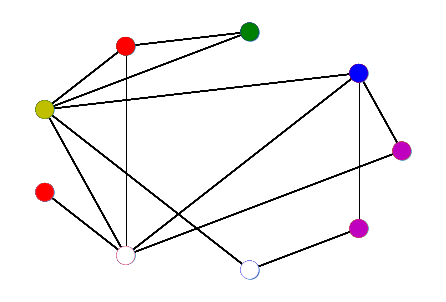

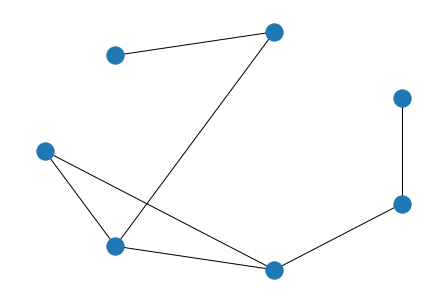

In [403]:
nx.draw_shell(g)

[['S', 'A'], ['S', 'B'], ['S', 'A', 'B'], ['S', 'A', 'D'], ['S', 'B', 'A'], ['S', 'B', 'C'], ['S', 'B', 'A', 'D'], ['S', 'A', 'B', 'C'], ['S', 'B', 'C', 'E'], ['S', 'A', 'B', 'C', 'E'], ['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]
BMS Paths: [['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]
[[], [], [['A', 'B']], [['A', 'D']], [['B', 'A']], [['B', 'C']], [['B', 'A'], ['A', 'D']], [['A', 'B'], ['B', 'C']], [['B', 'C'], ['C', 'E']], [['A', 'B'], ['B', 'C'], ['C', 'E']], [['A', 'D'], ['D', 'G']], [['B', 'A'], ['A', 'D'], ['D', 'G']]]
[('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'G')]
['green', 'green', 'green', 'green', 'green', 'green', 'green']
['green', 'green', 'green', 'green', 'green', 'green', 'green']
['green', 'green', 'green', 'green', 'green', 'green', 'green']
['green', 'green', 'blue', 'green', 'green', 'green', 'green']
['green', 'green', 'green', 'blue', 'green', 'green', 'green']
['green', 'green', 'blue', 'green', 'green', 'green', 'g

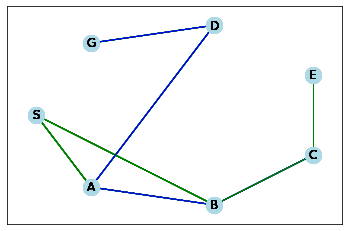

In [46]:
import networkx as nx
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

d={
    'S':{'A':3,'B':5},
    'A':{'S':3,'B':4,'D':3},
    'B':{'S':5,'A':4,'C':4},
    'C':{'B':4,'E':6},
    'E':{'C':6},
    'D':{'A':3,'G':5},
    'G':{'D':5}
}
l=[]
FR=BMS(d,'S','G',2)
for i in FR:
    #print(i)
    st=i[1:]
    tmp=[]
    for c in range(len(i[1:])):
        
        tmp.append(st[c:c+2])
    tmp.pop(-1)
    l+=[tmp]
l

print((l))
pos = nx.shell_layout(g)
def ret_edge(edge):
    
    c=0
    
    #print(edge)
    for i in g.edges:
        #print(i)
        if(edge==list(i) or edge[::-1]==list(i)):
            break
        c+=1
    #edge_col[c]="red"
    return c

def animate(i):
    edge_col=[]
    for j in range(len(g.edges)):
        edge_col+=["green"]
    tmp=edge_col.copy()
    #for i in range(len(l)):
    for j in (l[i]):
            tmp[ret_edge(j)]="blue"
    print(tmp)
        #node=nx.draw_shell(g, list(g.nodes),edge_color=tmp, with_labels=True, font_weight='bold')
    nx.draw_networkx_labels(g,pos)
    node=nx.draw_networkx_nodes(g, pos,nodelist=list(g.nodes), node_size=250,node_color='lightblue')
    edges=nx.draw_networkx_edges(g,pos,edgelist=list(g.edges),edge_color=tmp)
    return node,edges
g=nx.Graph()
g.add_nodes_from(d) 
for i in d.keys():
    for j in d[i].keys():
        g.add_edge(i,j)
print(g.edges)

fig=plt.gcf()
#nx.draw_shell(g, list(g.nodes), with_labels=True, font_weight='bold')

ani = animation.FuncAnimation(fig, animate, frames=len(l), interval=1000, repeat=True,blit=False)
#ani.save("D://anim.mp4")
HTML(ani.to_html5_video(30))

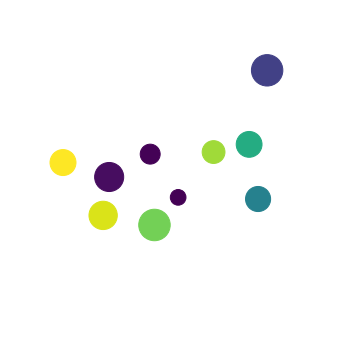

In [37]:

class anim:
    def __init__(self,d,l):
        self.d=d
        self.l=l
        


-1


AttributeError: 'NoneType' object has no attribute 't1'

In [331]:
from IPython.display import HTML

pip install ffmpeg-python

SyntaxError: invalid syntax (3725499954.py, line 3)

In [369]:
def beamsearch(d,bw):
    queue=[[0,'S']]
    fr=[]
    goal='G'
    Beam=bw
    gn=[]
    f=0
    #print(queue)
    n_g=0
    f=n_g
    while(len(queue)!=0):
        print(queue)
        tmp=queue.copy()
        sl=[]
        for j in range(len(tmp)):
            cp=queue.pop(0)
            n=cp[-1]
            for i in d[n].keys():    # SAme loops as oracle search 
                #print(i)
                if i in cp:
                    continue
                el=cp+[i]
                el[0]+=d[n][i]
                sl.append(el)
                #queue.append(el)
                sl.sort(key=lambda x: x[0])
                if goal==i:
                    f=1
                    gn=el
        queue=sl
        if f==1:
            fr.append(queue.copy())
            break
        queue=queue[:Beam+2].copy()
        fr.append(queue.copy())
    print(fr)
    print(gn)

In [370]:
d1={
    'S':{'A':7.2,'B':6.2},
    'A':{'S':0,'B':6.2,'D':5},
    'B':{'S':5,'A':4,'C':7.4},
    'C':{'B':6.2,'E':0},
    'E':{'C':7.4},
    'D':{'A':7.2,'G':0},
    'G':{'D':5}
}
beamsearch(d1,2)

[[0, 'S']]
[[6.2, 'S', 'B'], [7.2, 'S', 'A']]
[[10.2, 'S', 'B', 'A'], [12.2, 'S', 'A', 'D'], [13.4, 'S', 'A', 'B'], [13.600000000000001, 'S', 'B', 'C']]
[[[6.2, 'S', 'B'], [7.2, 'S', 'A']], [[10.2, 'S', 'B', 'A'], [12.2, 'S', 'A', 'D'], [13.4, 'S', 'A', 'B'], [13.600000000000001, 'S', 'B', 'C']], [[12.2, 'S', 'A', 'D', 'G'], [13.600000000000001, 'S', 'B', 'C', 'E'], [15.2, 'S', 'B', 'A', 'D'], [20.8, 'S', 'A', 'B', 'C']]]
[12.2, 'S', 'A', 'D', 'G']


In [1]:
node=nx.draw_networkx_nodes(g, pos,nodelist=list(g.nodes), ax=ax, node_color='blue')
    
edge=nx.draw_networkx_edges(g, pos,edgelist=list(g.edges) ,ax=ax)


NameError: name 'nx' is not defined